### First we'll make a model based on gini index with max depth = 6

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd


data = pd.read_csv('SAheart.txt')

# Convert 'famhist' column to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['famhist'])

X_features = data[['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist_Absent', 'famhist_Present', 'typea', 'obesity', 'alcohol', 'age']]
Y_features = data['chd']

X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.2, random_state=42)

# Create a decision tree classifier with Gini Index and max-depth of 6
model1 = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)

# Fit the model to the training data
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate other metrics from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.71

Confusion Matrix:
 [[52  7]
 [20 14]]
Precision: 0.67
Recall: 0.41
F1-Score: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        59
           1       0.67      0.41      0.51        34

    accuracy                           0.71        93
   macro avg       0.69      0.65      0.65        93
weighted avg       0.70      0.71      0.69        93



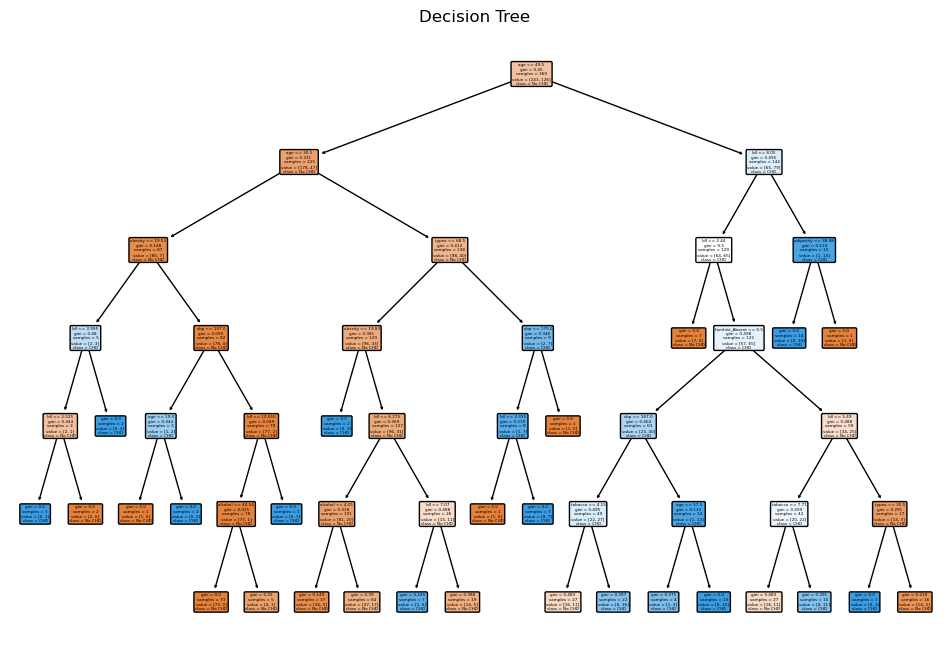

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model1, feature_names=X_features.columns, class_names=["No CHD", "CHD"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

### To make a model based on gain ratio we'll have to make a custom function to do so.

In [5]:
import numpy as np
def gain_ratio(X, y):
    total_entropy = -np.sum([(len(y[y == c]) / len(y)) * np.log2(len(y[y == c]) / len(y)) for c in np.unique(y)])
    feature_entropy = 0
    iv = 0

    for value in np.unique(X):
        subset_y = y[X == value]
        feature_entropy += (len(subset_y) / len(y)) * (-np.sum([(len(subset_y[subset_y == c]) / len(subset_y)) * np.log2(len(subset_y[subset_y == c]) / len(subset_y)) for c in np.unique(subset_y)]))
        iv += (len(subset_y) / len(y)) * np.log2(len(subset_y) / len(y))

    return total_entropy, feature_entropy, iv

feature_gain_ratios = []
for column in X_features.columns:
    total_entropy, feature_entropy, iv = gain_ratio(X_features[column], Y_features)
    information_gain = total_entropy - feature_entropy
    gain_ratio_value = information_gain / iv
    feature_gain_ratios.append((column, gain_ratio_value))

feature_gain_ratios.sort(key=lambda x: x[1], reverse=True)

k = 5  
selected_features = [feature for feature, _ in feature_gain_ratios[:k]]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model2 = DecisionTreeClassifier(max_depth=6)

model2.fit(X_train_selected, y_train)

y_pred = model2.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6881720430107527


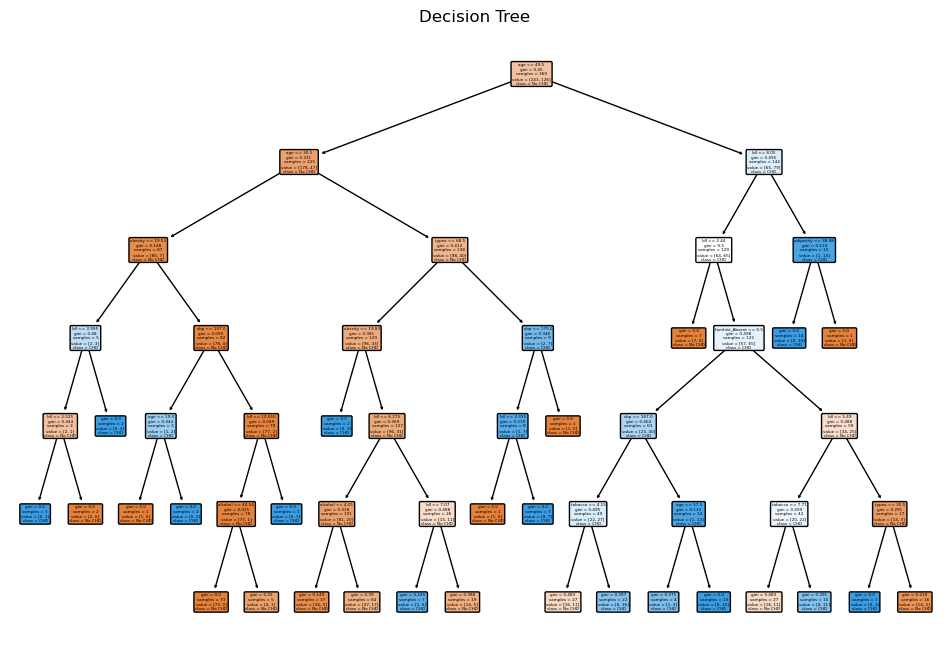

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model1, feature_names=X_features.columns, class_names=["No CHD", "CHD"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

### Making a model based on information gain

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.2, random_state=42)

# Create a decision tree classifier with Information Gain (entropy criterion)
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

# Fit the model to the training data
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Calculate accuracy and print the classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        59
           1       0.58      0.62      0.60        34

    accuracy                           0.70        93
   macro avg       0.68      0.68      0.68        93
weighted avg       0.70      0.70      0.70        93

Confusion Matrix:
 [[44 15]
 [13 21]]


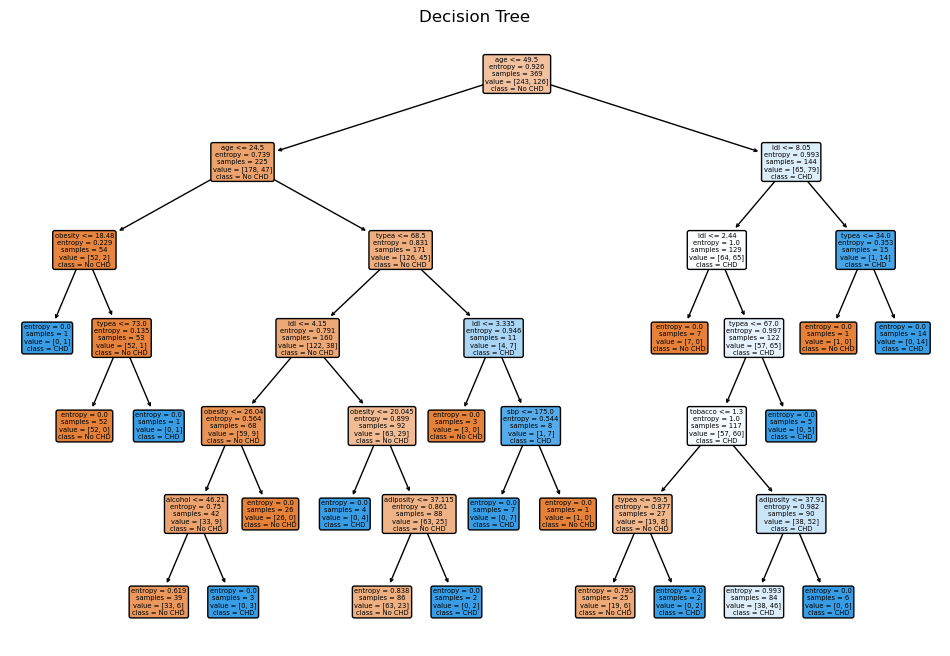

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model3, feature_names=X_features.columns, class_names=["No CHD", "CHD"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

### The accuracy for the decision tree we made using gini index is 0.71, and the accuracy for the decision tree we made using gain ratio is 0.68 which is less than the accuracy of the decision tree we made using gini index. The accuracy for the decision tree we made using information gain / entropy is 0.70 which is somewhat similar to the accuracy of the decision tree we made using gini index.

### In last lab, the accuracy we got using the logistic regression model was 0.66 which is less than the accuracy of the decision tree we made using gini index and information gain. So, we can say that the decision tree we made using gini index and information gain is better than the logistic regression model.